In [136]:
import importlib
import eval_functions
importlib.reload(eval_functions)
from eval_functions import *
import pandas as pd
from enum import Enum
import numpy as n

from IPython.display import display
# make tables interactive
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True, connected=True)
opt.maxBytes=0

In [ ]:
MEDUSA_SYLVAN_BASE="medusa-sylvan-base"
MEDUSA_BUDDY_BASE="medusa-motobuddy-base"
MEDUSA_SYLVAN_LOOP="medusa-sylvan-loop"
MEDUSA_BUDDY_LOOP="medusa-motobuddy-loop" 
SLIQSIM="sliqsim"

# Timeout (in seconds) 
TIMEOUT=120


TOOLS = list(dict.fromkeys([ # small hack so that we get list of unique values (i.e. a set, but also in the given order; see https://stackoverflow.com/questions/1653970/does-python-have-an-ordered-set)
  MEDUSA_SYLVAN_BASE,
  MEDUSA_BUDDY_BASE,

  #MEDUSA_BUDDY_LOOP,
  #MEDUSA_SYLVAN_LOOP,

  SLIQSIM,

    # you can add more tools here directly if needed
]))

BENCHES = [
  "no-measure_BernsteinVazirani",
  # "no-measure_Feynman",
  # "no-measure_MCToffoli",
  # "no-measure_ModifiedRevLib",
  # "no-measure_MOGrover",
  # "no-measure_Random",
  # "no-measure_RevLib",

  #"no-measure_LP-Grover",
  #"no-measure_LP-PeriodFinding",
  #"no-measure_LP-QuantumCounting",

  #"no-measure_LP-all",
  #"no-measure_SL-all"
]

In [138]:
df_all = load_benches(BENCHES, TOOLS, TIMEOUT) # last parameter is timeout
classification_df = parse_classifications_for_benchmarks(BENCHES)
# Join with main data
df_all = join_with_classification(df_all, classification_df)


## Evaluation

In [139]:
print(simple_table(df_all, TOOLS, BENCHES, separately=False))
print(simple_table(df_all, TOOLS, BENCHES, separately=True))

# of circuits: 183
----------------------------------------------------------------------------------------------------
tool                     ✅    ❌    time-total    time-avg    time-med    memory-total    memory-avg    memory-med    TO    ERR
---------------------  ----  ----  ------------  ----------  ----------  --------------  ------------  ------------  ----  -----
medusa-motobuddy-loop   183  0.00      14556.75       79.55      120.00      1193932.00       6524.22          0.00  0.00   0.00
medusa-sylvan-loop      183  0.00      14599.99       79.78      120.00      7465308.00      40794.03          0.00  0.00   0.00
----------------------------------------------------------------------------------------------------


Benchmark no-measure_LP-Grover
# of circuits: 46
----------------------------------------------------------------------------------------------------
tool                     ✅    ❌    time-total    time-avg    time-med    memory-total    memory-avg    memory-med

In [140]:
TOOL_FOR_COMPARISON = MEDUSA_BUDDY_LOOP

### Time

/home/fifix/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


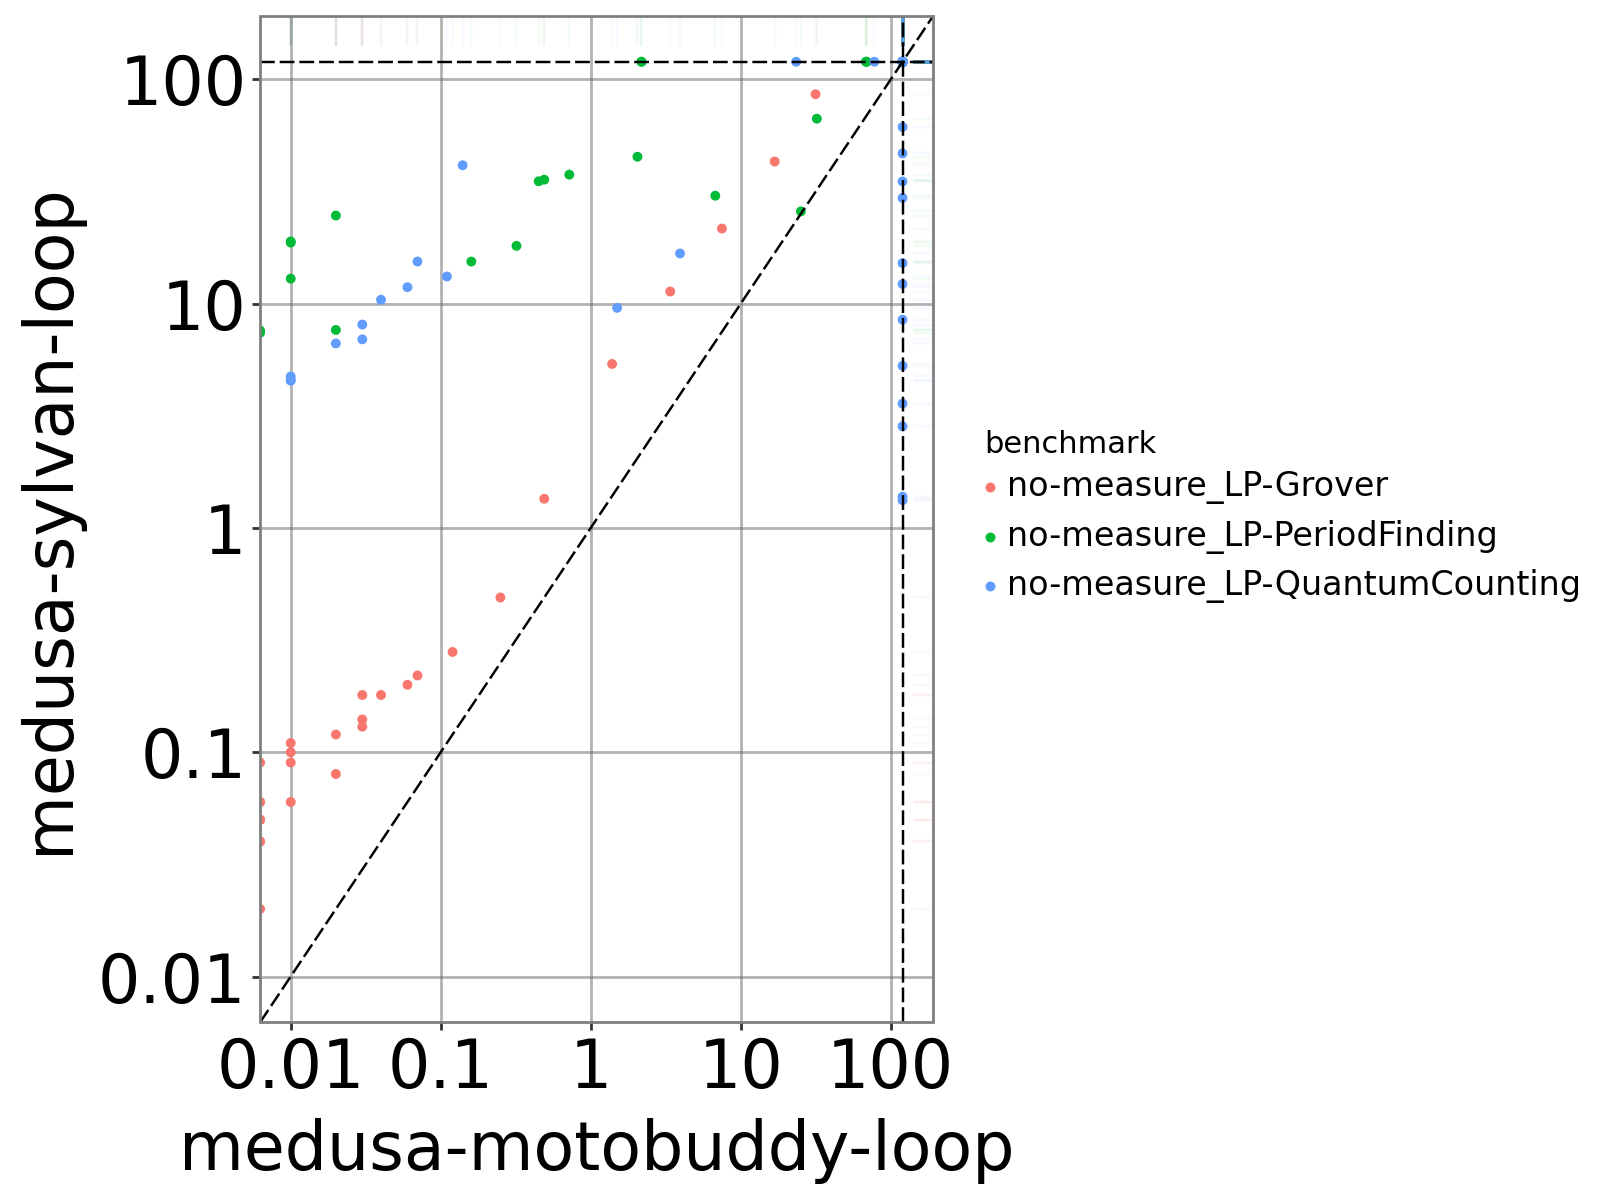

In [141]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        display(scatter_plot(df_all, TOOL_FOR_COMPARISON, tool, clamp=False, clamp_domain=[0.01,120], 
                             color_column="benchmark", timeout=TIMEOUT))

/home/fifix/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


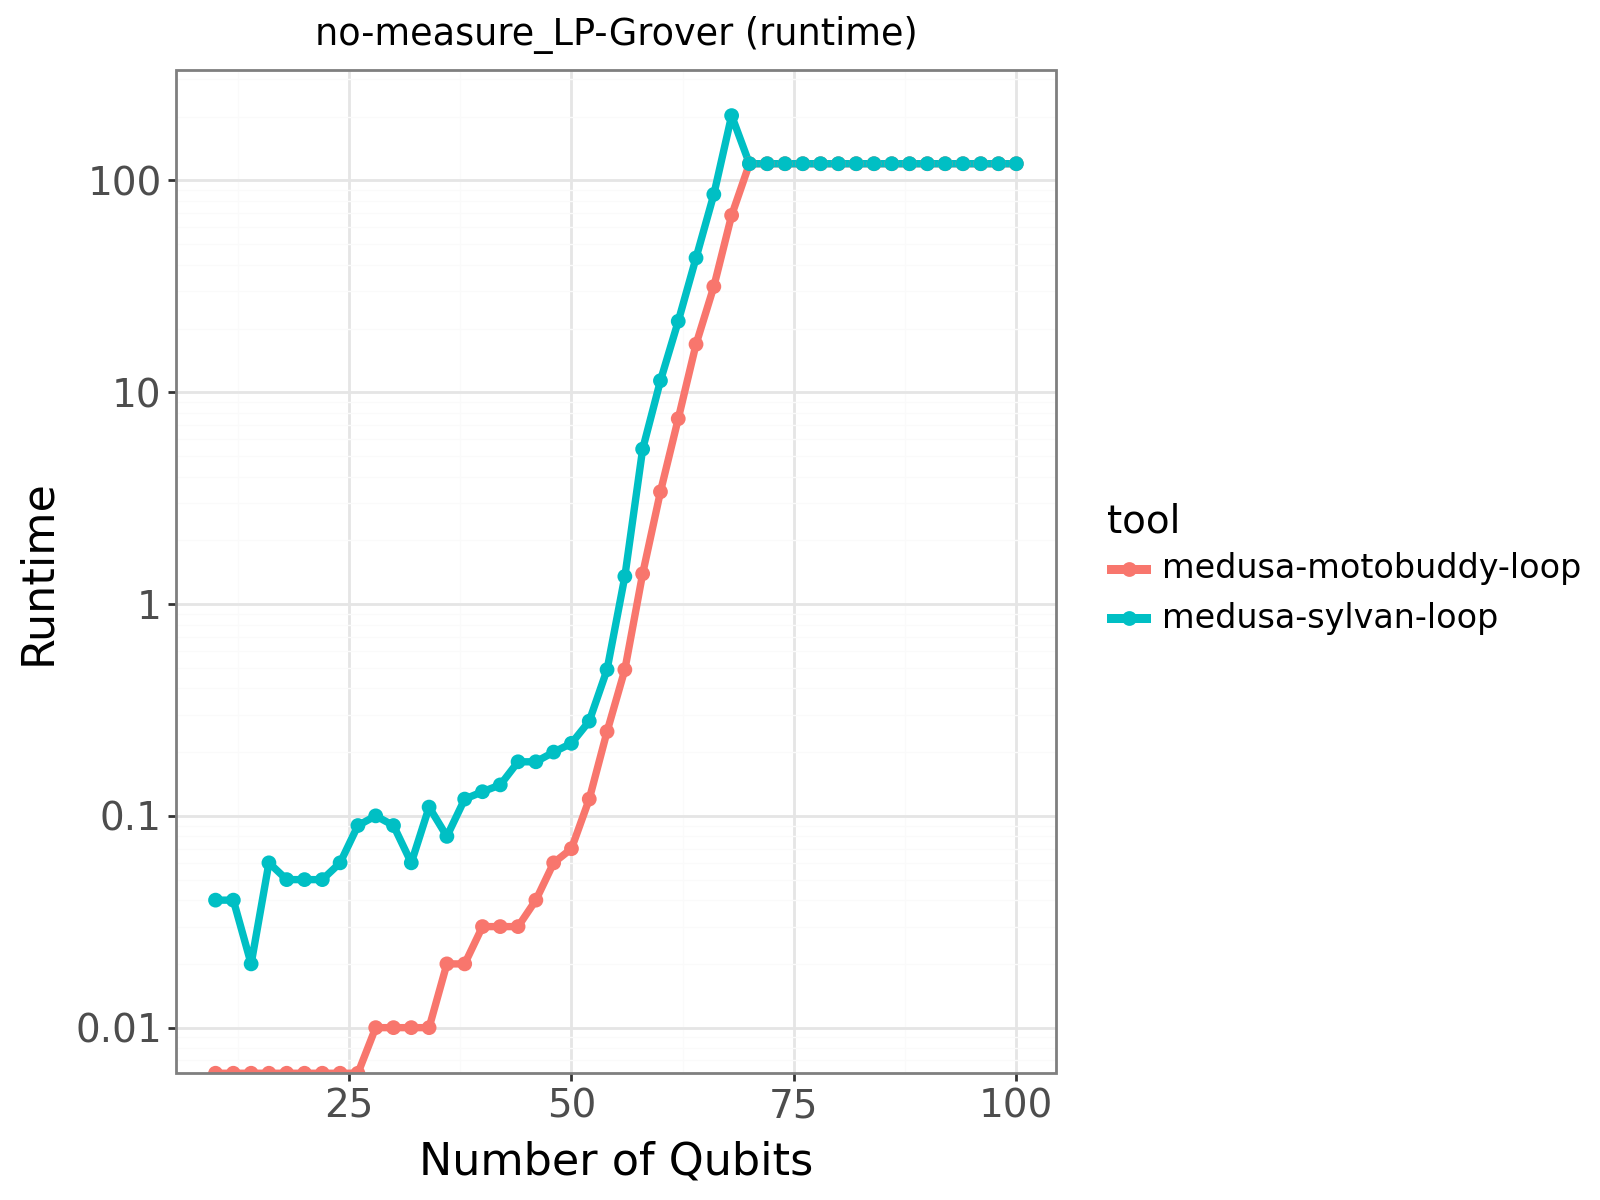

/home/fifix/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


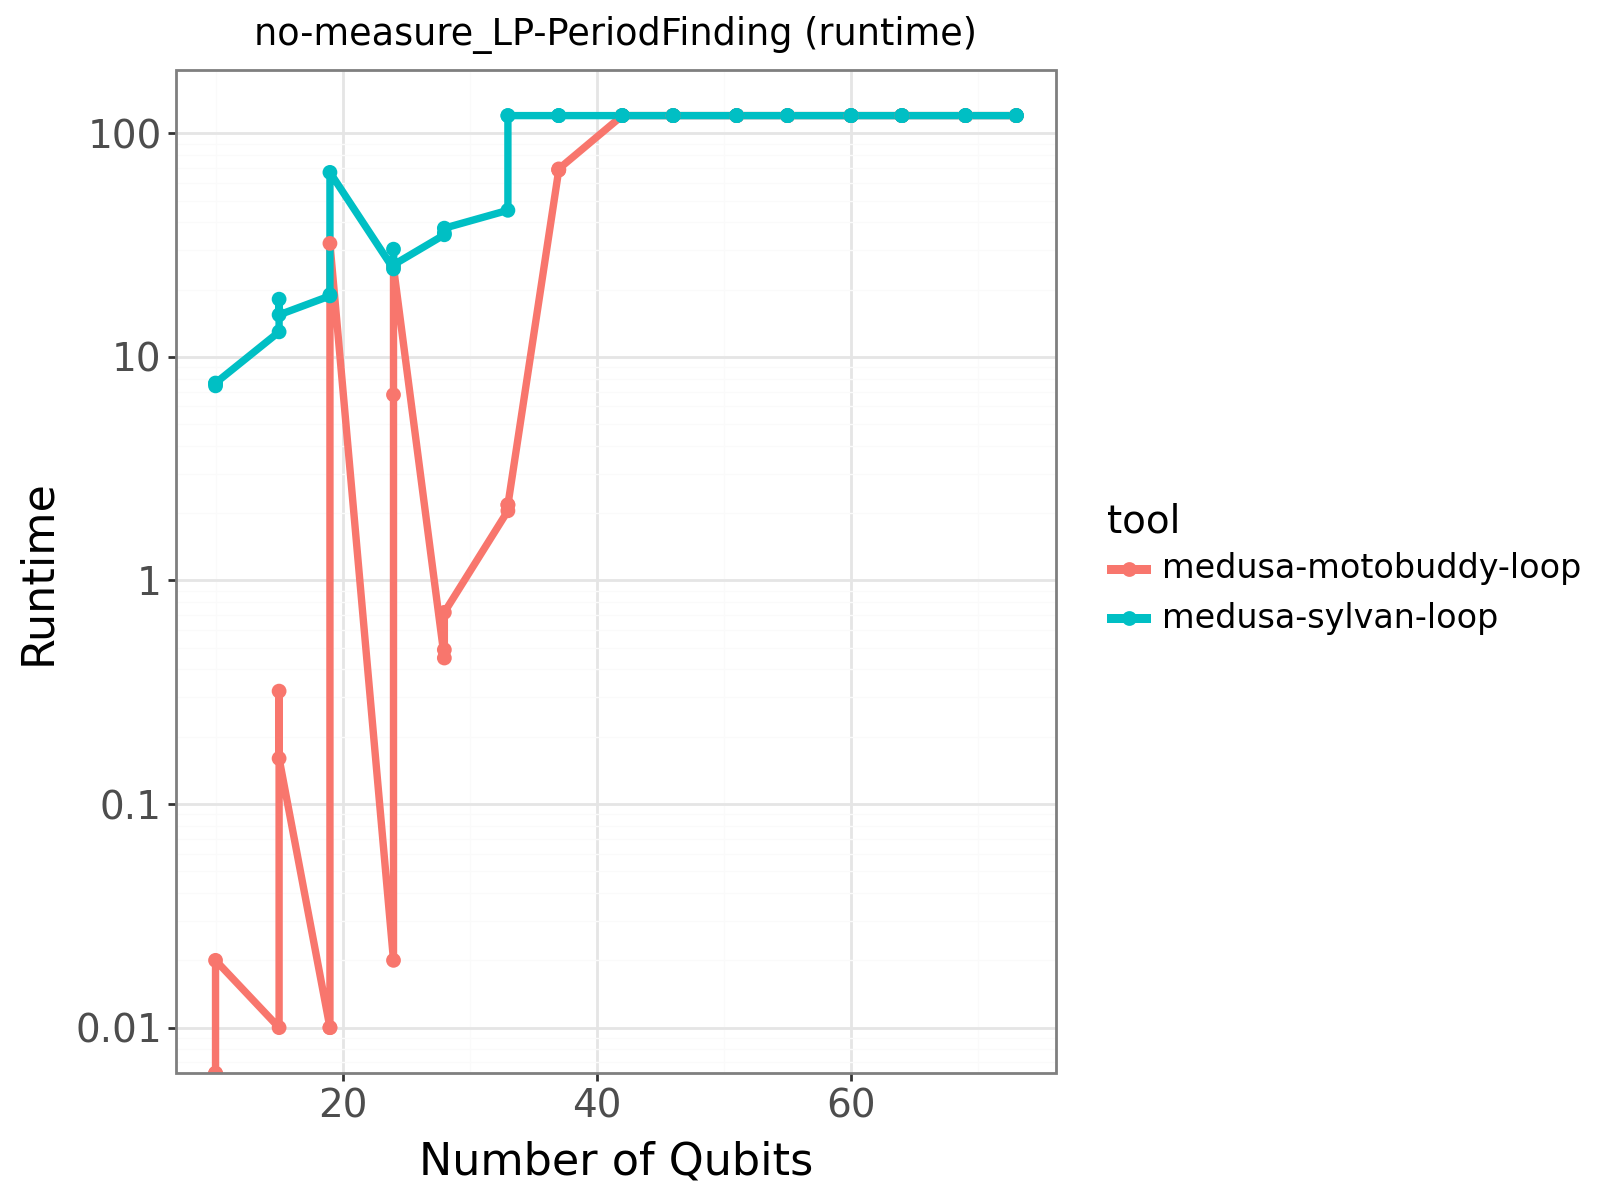

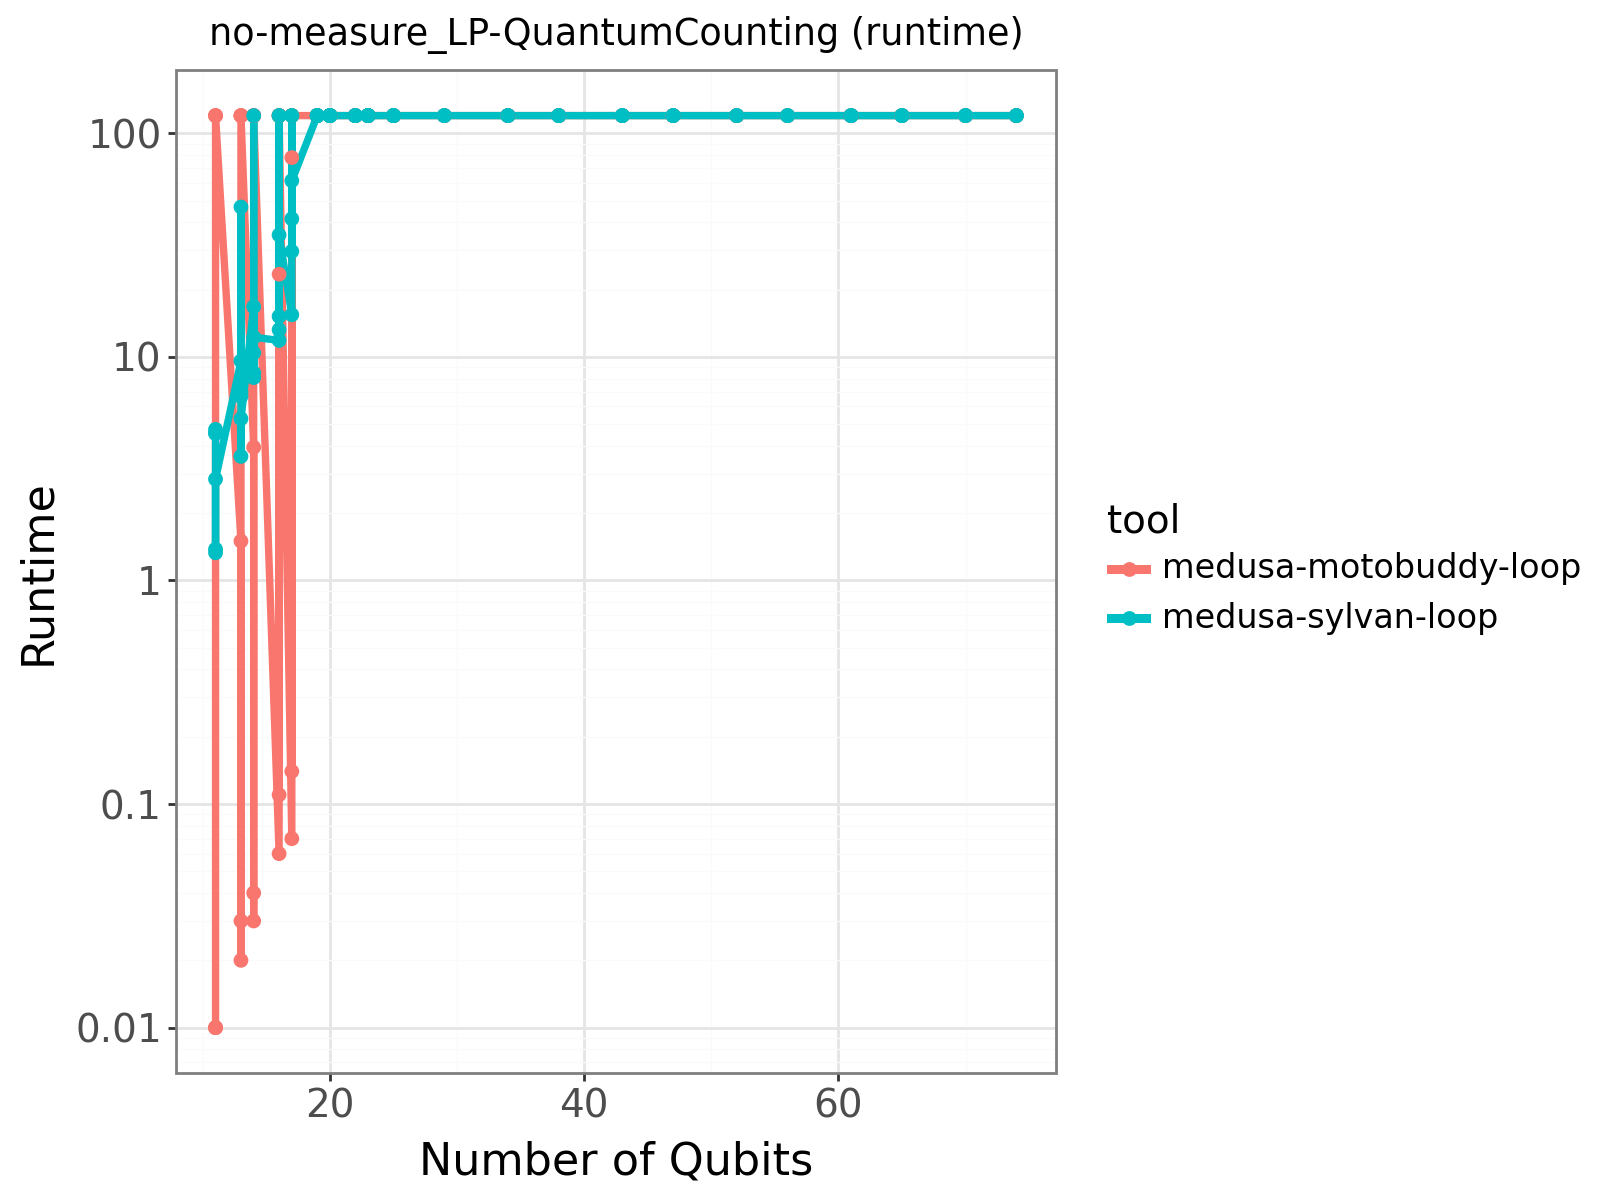

In [142]:
df_class = parse_classifications_for_benchmarks(BENCHES)
df_combined = join_with_classification(df_all, df_class)
df_combined["num_qubits"] = df_combined["info_x"].apply(lambda d: d.get("num_qubits", 0))
for bench in BENCHES:
    display(plot_tool_vs_qubits(df_combined, TOOLS, bench))

### Memory

/home/fifix/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


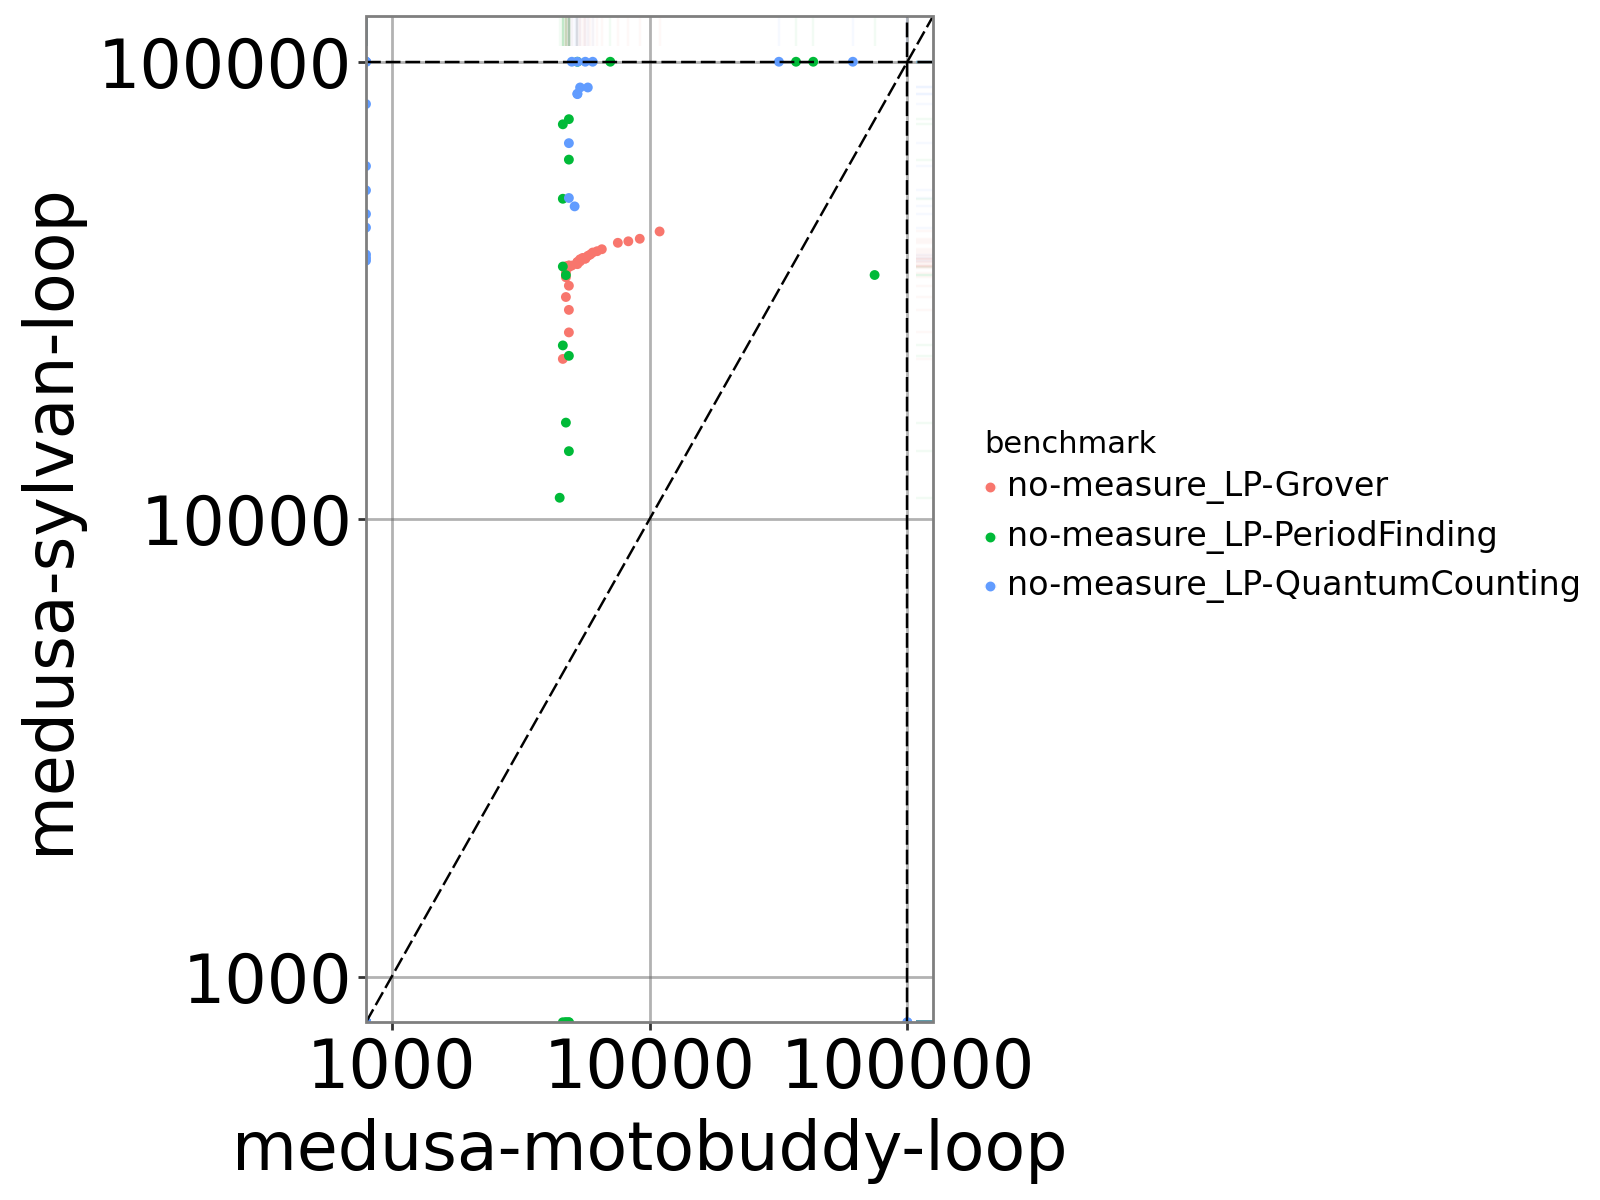

In [143]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        display(scatter_plot(df_all, TOOL_FOR_COMPARISON, tool, property="memory", clamp=True, clamp_domain=[1000,100000], color_column="benchmark", timeout=100000))

/home/fifix/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


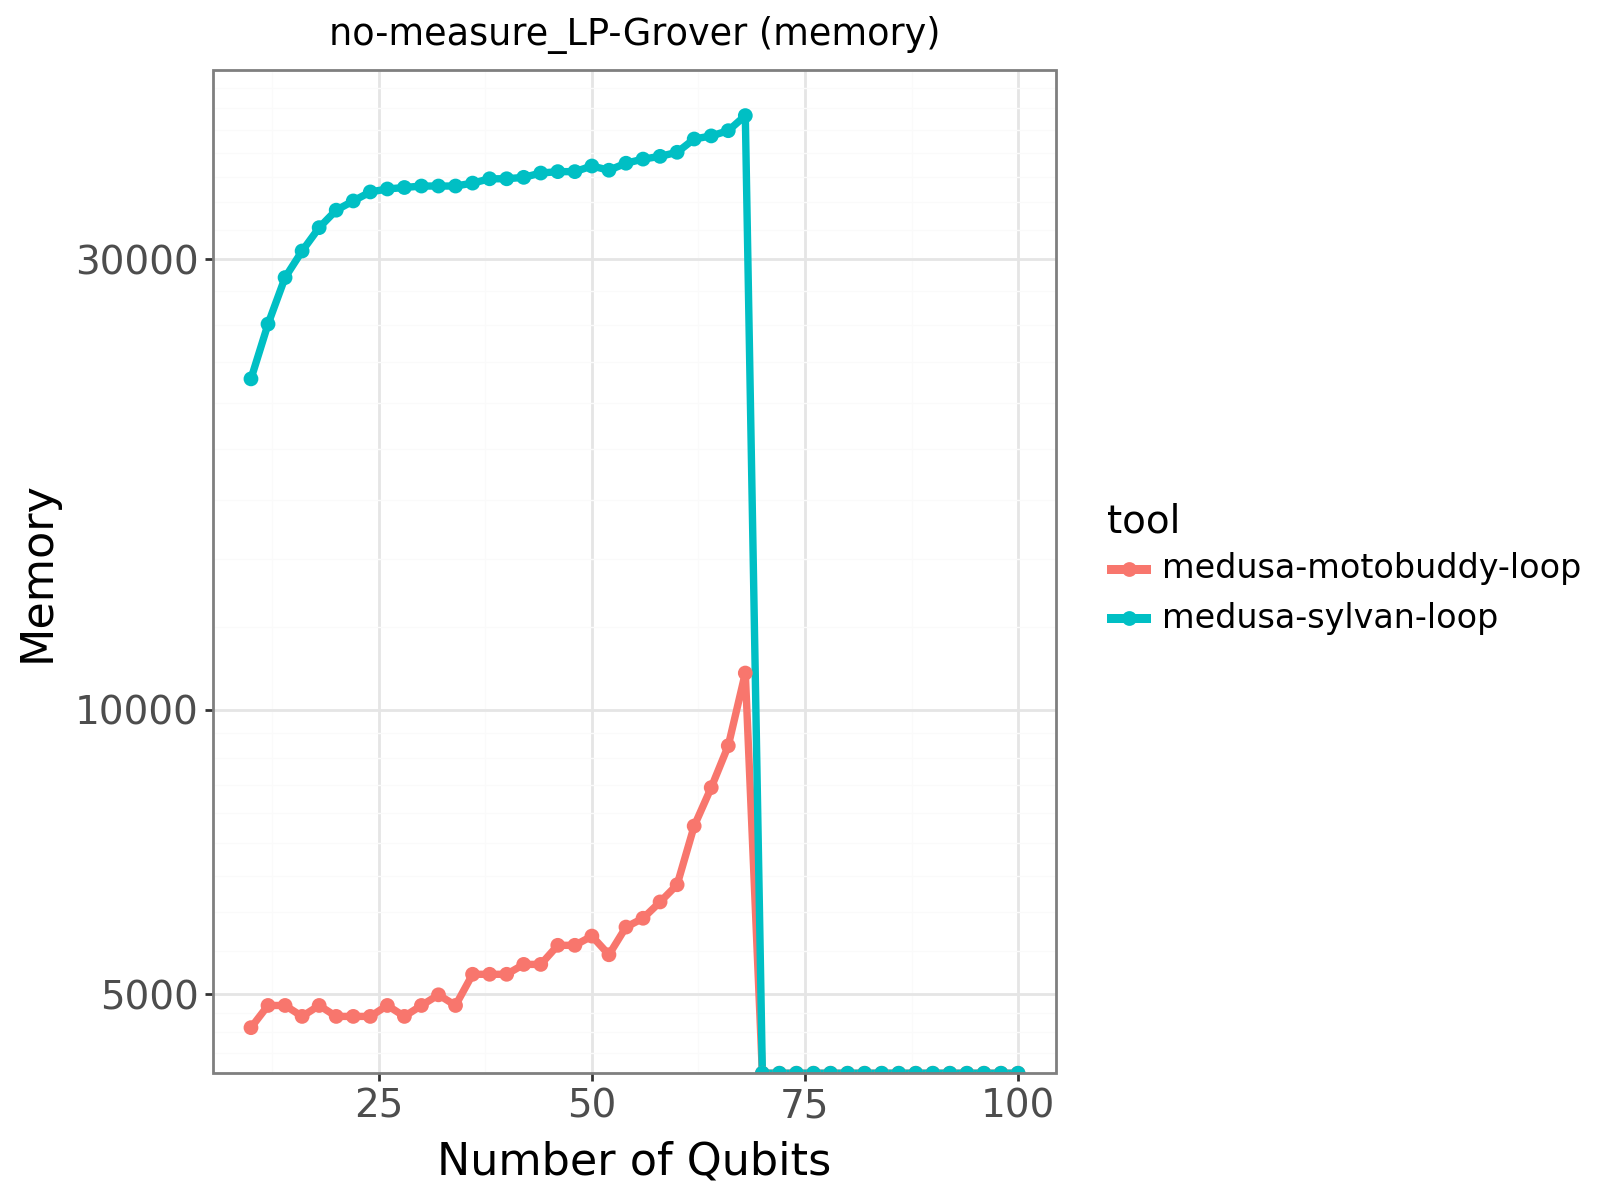

/home/fifix/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


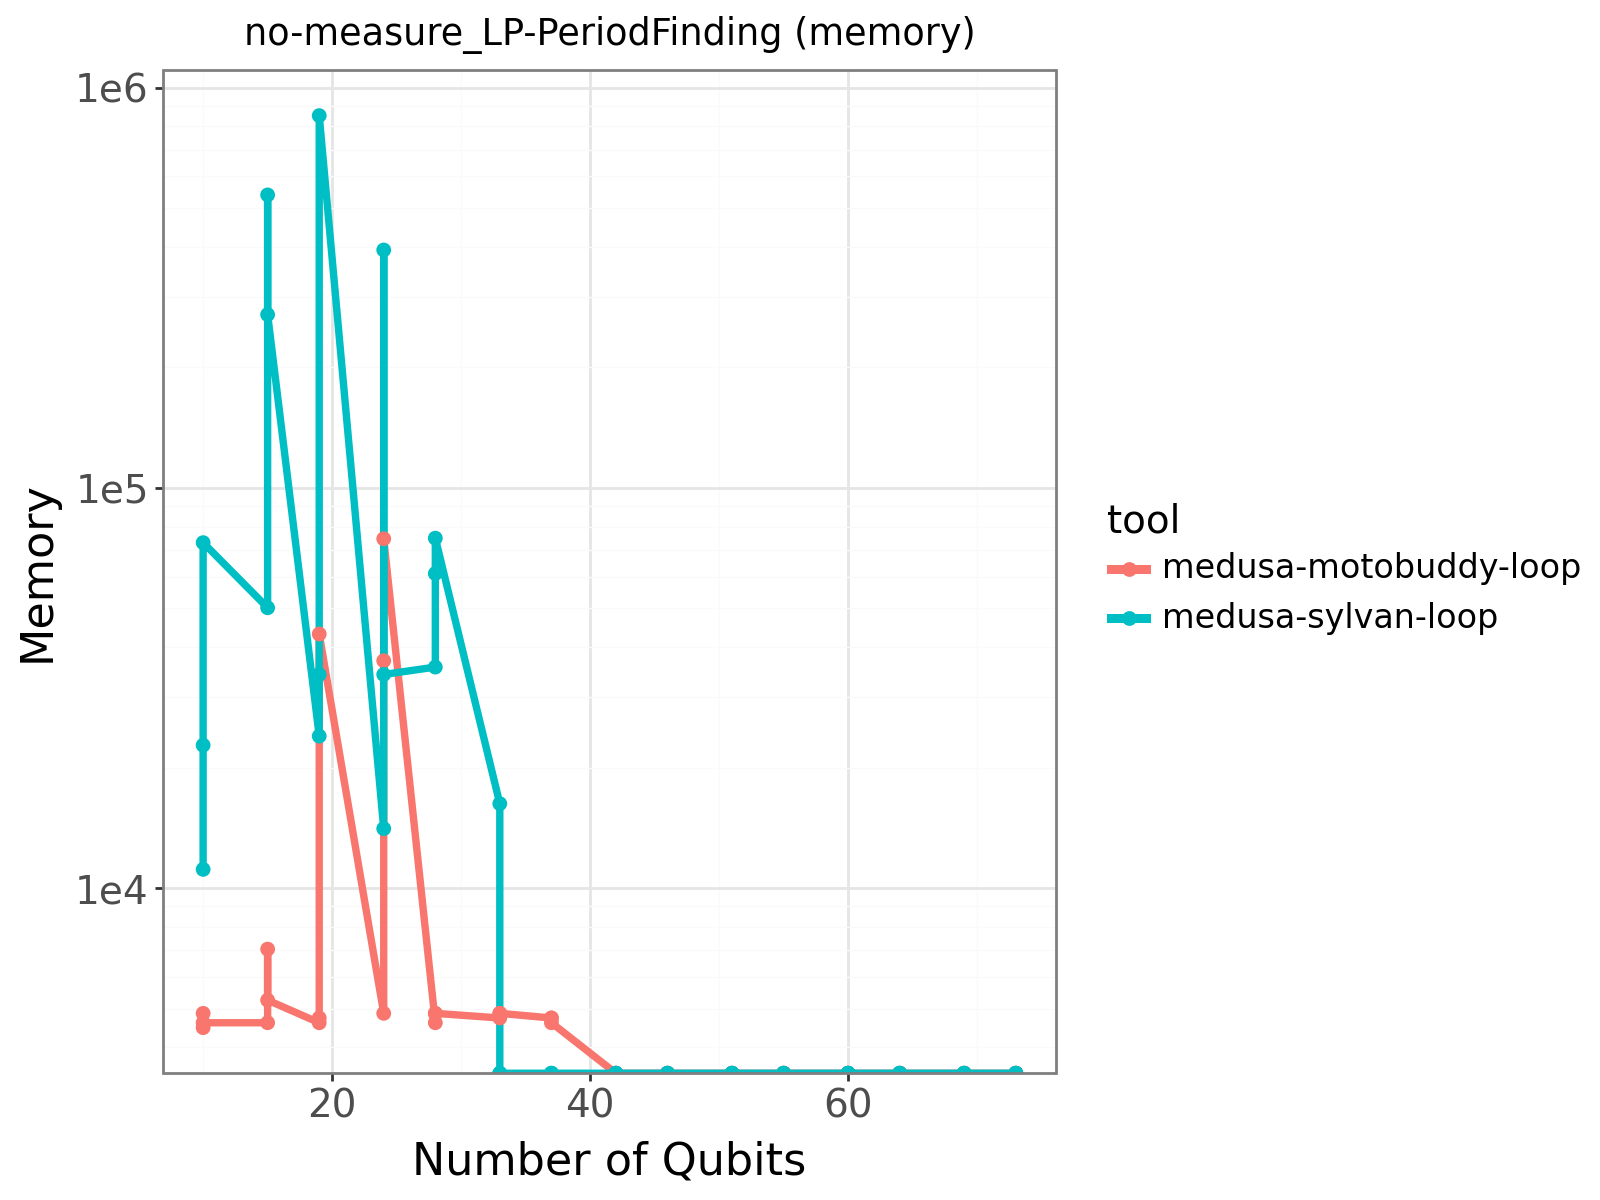

/home/fifix/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


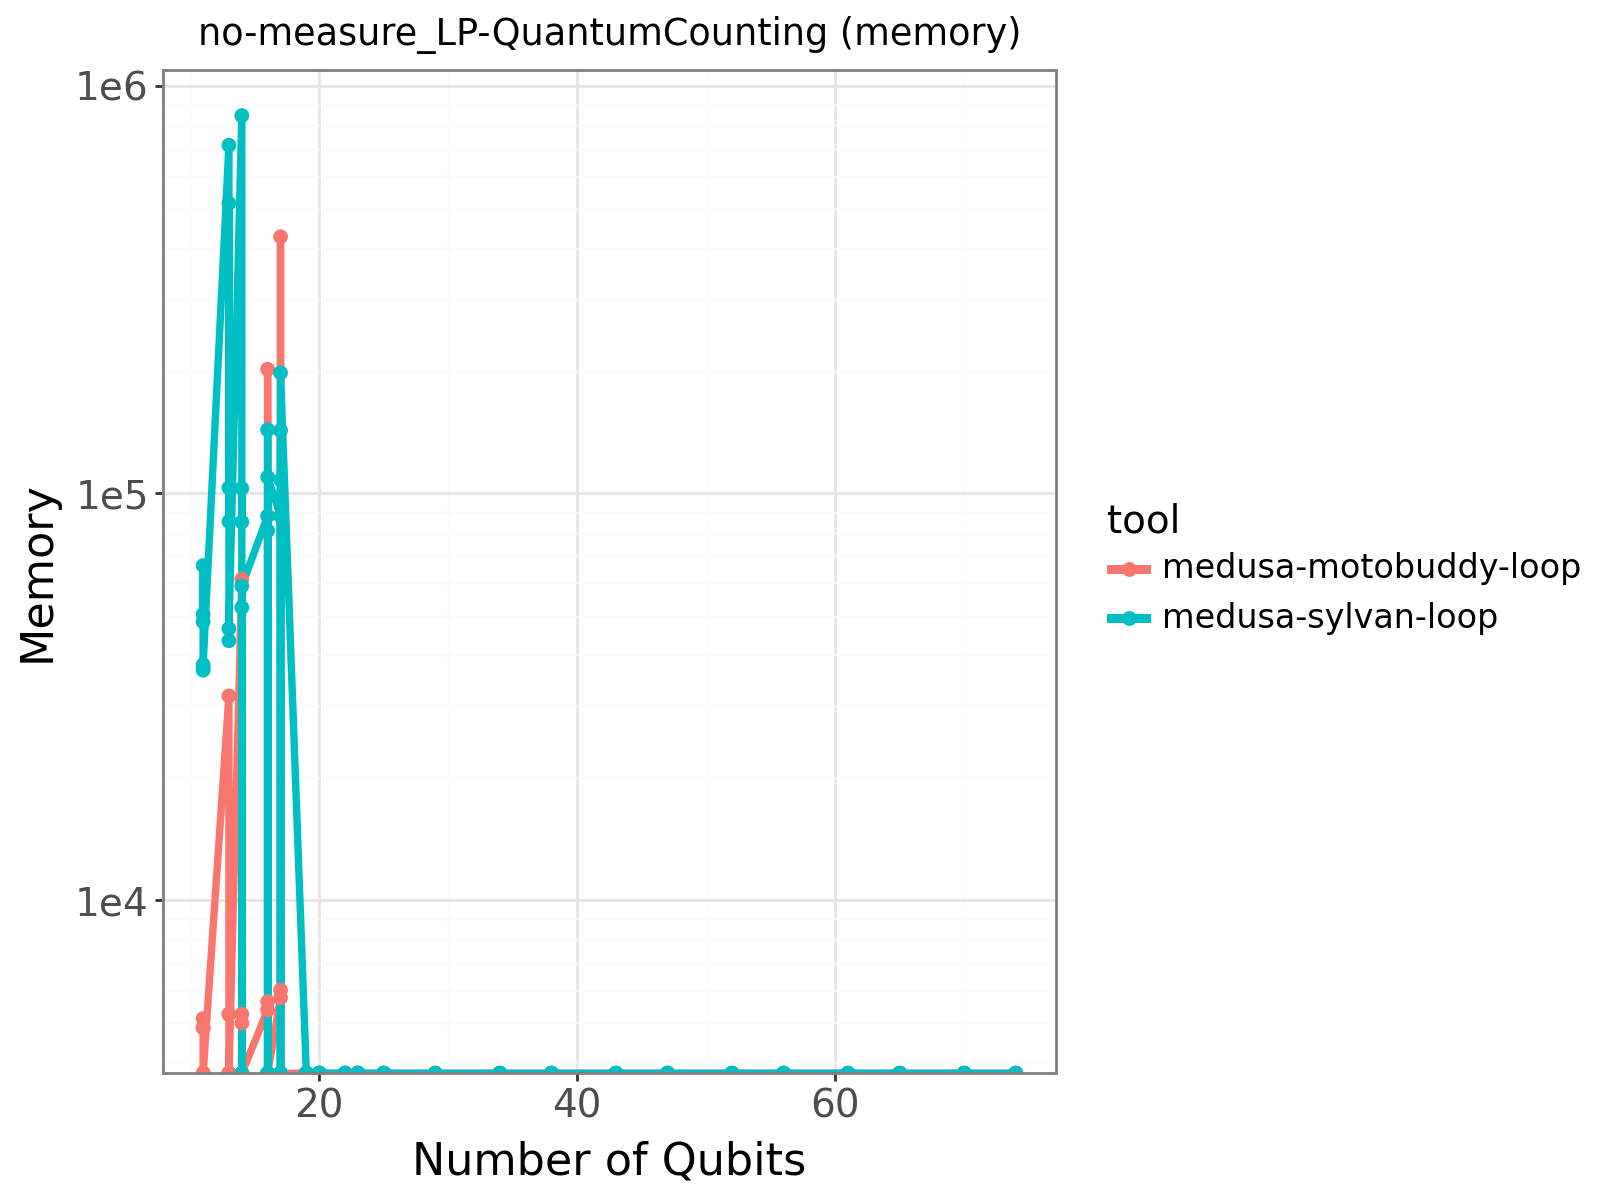

In [144]:
for bench in BENCHES:
    display(plot_tool_vs_qubits(df_combined, TOOLS, bench, property="memory"))